In [1]:
#Step 1 and 2 = import requests and beautiful soup and make dataset list
import requests 

In [2]:
import pandas as pd

In [3]:
from bs4 import BeautifulSoup

In [4]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [5]:
response

<Response [200]>

In [6]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n\n    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>\n    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"\n            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="\n            crossorigi

In [7]:
html_string = response.text

In [8]:
document = BeautifulSoup(html_string, "html.parser")

In [9]:
document.find_all('h3')

[<h3>Aids</h3>,
 <h3>Airlines</h3>,
 <h3>Billionaires</h3>,
 <h3>Broadway</h3>,
 <h3>Business Dynamics</h3>,
 <h3>Cancer</h3>,
 <h3>Cars</h3>,
 <h3>Classics</h3>,
 <h3>Construction Permits</h3>,
 <h3>Construction Spending</h3>,
 <h3>County Demographics</h3>,
 <h3>Covid</h3>,
 <h3>Drugs</h3>,
 <h3>Earthquakes</h3>,
 <h3>Election</h3>,
 <h3>Electricity</h3>,
 <h3>Emissions</h3>,
 <h3>Energy</h3>,
 <h3>Finance</h3>,
 <h3>Food</h3>,
 <h3>Food Access</h3>,
 <h3>Global Development</h3>,
 <h3>Graduates</h3>,
 <h3>Health</h3>,
 <h3>Hospitals</h3>,
 <h3>Hydropower</h3>,
 <h3>Ingredients</h3>,
 <h3>Injuries</h3>,
 <h3>Labor</h3>,
 <h3>Medal Of Honor</h3>,
 <h3>Music</h3>,
 <h3>Opioids</h3>,
 <h3>Police Shootings</h3>,
 <h3>Publishers</h3>,
 <h3>Real Estate</h3>,
 <h3>Retail Services</h3>,
 <h3>School Scores</h3>,
 <h3>Skyscrapers</h3>,
 <h3>Slavery</h3>,
 <h3>State Crime</h3>,
 <h3>State Demographics</h3>,
 <h3>State Fragility</h3>,
 <h3>Suicide Attacks</h3>,
 <h3>Supreme Court</h3>,
 <h3>Tate</

In [10]:
#make h3 list
list = []
for i in document.find_all('h3'):
    list.append(i.text.strip())
print(list)

['Aids', 'Airlines', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Construction Permits', 'Construction Spending', 'County Demographics', 'Covid', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Music', 'Opioids', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Supreme Court', 'Tate', 'Video Games', 'Weather', 'Wind Turbines']


In [11]:
def pdcorgis(a):
    a = a.lower()
    r = requests.get('https://corgis-edu.github.io/corgis/csv/'+a+'/') #access first web page
    html_string2 = r.text
    document2 = BeautifulSoup(html_string2, "html.parser")
    for i in document2.find_all("a"): #searching for the download link
        if i.has_attr('download') == True:
            csv=i['href']
    
    full_link = 'https://corgis-edu.github.io/corgis/csv/'+ a +'/' + csv 
    corgisdf = pd.read_csv(full_link) #turn csv link into dataframe
    return corgisdf
           
        
   
    

In [12]:
pdcorgis("Aids")


,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
1,Algeria,1990,200,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,200,100,500
2,Angola,1990,1300,500,1000,500,200,200,0.2,0.1,...,1700,1000,3400,2800,0.47,12000,4600,6100,1100,11000
3,Argentina,1990,500,200,500,100,100,200,0.1,0.1,...,1200,200,4500,4400,0.19,13000,9100,3700,200,13000
4,Armenia,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,Venezuela (Bolivarian Republic of),2020,39000,3900,4200,500,2500,1400,0.5,0.1,...,1000,500,2200,1900,0.09,100000,60000,40000,3300,99000
2755,Viet Nam,2020,83000,3700,3800,100,1000,2900,0.3,0.1,...,2000,500,6100,5900,0.08,250000,160000,80000,4300,240000
2756,Yemen,2020,5500,500,500,100,100,200,0.1,0.1,...,500,100,1100,1000,0.05,11000,6300,3700,1000,10000
2757,Zambia,2020,700000,19000,24000,5300,10000,8700,11.1,2.3,...,39000,8300,69000,61000,6.07,1500000,520000,850000,82000,1400000


In [13]:
df = pdcorgis("Aids")

In [14]:
df.head()

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
1,Algeria,1990,200,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,200,100,500
2,Angola,1990,1300,500,1000,500,200,200,0.2,0.1,...,1700,1000,3400,2800,0.47,12000,4600,6100,1100,11000
3,Argentina,1990,500,200,500,100,100,200,0.1,0.1,...,1200,200,4500,4400,0.19,13000,9100,3700,200,13000
4,Armenia,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100


In [15]:
import matplotlib.pyplot as plt
#choose specific column
df.loc[[0,1,2,3,4,5,6,7,8,9,10],['Data.People Living with HIV.Total','Country']] 

,Data.People Living with HIV.Total,Country
0,500,Afghanistan
1,500,Algeria
2,12000,Angola
3,13000,Argentina
4,100,Armenia
5,200,Azerbaijan
6,21000,Benin
7,1200,Bolivia (Plurinational State of)
8,40000,Botswana
9,130000,Burkina Faso


    Data.People Living with HIV.Total                           Country
0                                 500                       Afghanistan
1                                 500                           Algeria
2                               12000                            Angola
3                               13000                         Argentina
4                                 100                           Armenia
5                                 200                        Azerbaijan
6                               21000                             Benin
7                                1200  Bolivia (Plurinational State of)
8                               40000                          Botswana
9                              130000                      Burkina Faso
10                             110000                           Burundi


<AxesSubplot:ylabel='Country'>

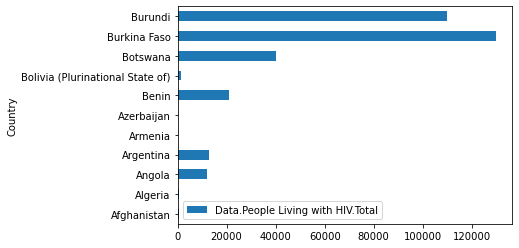

In [16]:
#making the bar plot for AIDS dataframe 
new_df = df.loc[[0,1,2,3,4,5,6,7,8,9,10],['Data.People Living with HIV.Total','Country']] #smallerdata
print(new_df)
Country = []
HIVTotal = []

for i in range(0,11): 
    Country.append(df.loc[i][0])
    HIVTotal.append(df.loc[i, 'Data.People Living with HIV.Total'])
    
# print(HIVTotal)

new_df.plot(kind='barh', x='Country', y='Data.People Living with HIV.Total')

In [17]:
#define new dataset from corgis list 
df2 = pdcorgis("Cancer")

In [18]:
df2.loc[[0,1,2,3,4,5,6,7,8,9,10],['Types.Lung.Race.Black','Total.Population']] 

,Types.Lung.Race.Black,Total.Population
0,52.6,33387205.0
1,45.6,4966180.0
2,38.2,44845598.0
3,62.9,20382448.0
4,46.5,261135696.0
5,40.4,35267734.0
6,38.4,24975889.0
7,49.3,6295263.0
8,53.6,4245359.0
9,38.1,132277071.0


    Types.Lung.Race.Black  Total.Population
0                    52.6        33387205.0
1                    45.6         4966180.0
2                    38.2        44845598.0
3                    62.9        20382448.0
4                    46.5       261135696.0
5                    40.4        35267734.0
6                    38.4        24975889.0
7                    49.3         6295263.0
8                    53.6         4245359.0
9                    38.1       132277071.0
10                   45.1        67890652.0


<AxesSubplot:ylabel='Frequency'>

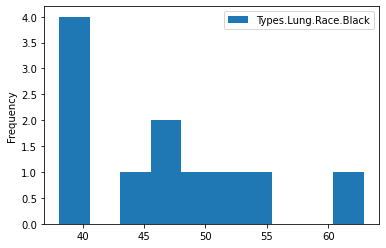

In [19]:
#make histogram for Cancer 
new_df2 = df2.loc[[0,1,2,3,4,5,6,7,8,9,10],['Types.Lung.Race.Black','Total.Population']]
print(new_df2)
Population = []
Lungs = []

for i in range(0,11): 
    Population.append(df2.loc[i][0])
    Lungs.append(df2.loc[i, 'Types.Lung.Race.Black'])
    
# print(Lungs)

new_df2.plot(kind='hist', x='Total.Population', y='Types.Lung.Race.Black')

In [20]:
#define new dataset from corgis list 
df3=pdcorgis("Covid")
df3

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776


<AxesSubplot:title={'center':'Covid Data Rate in Afganistan 4/2020'}, xlabel='Date.Day'>

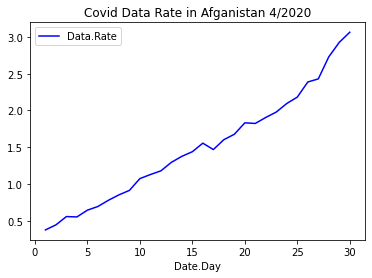

In [21]:
#make line plot
df4 = df3.loc[df3["Location.Country"] == "Afghanistan"]

df5 = df4.loc[df3["Date.Month"] == 4]

df5.plot.line(x='Date.Day', y='Data.Rate', color = "blue", title = "Covid Data Rate in Afganistan 4/2020")